In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


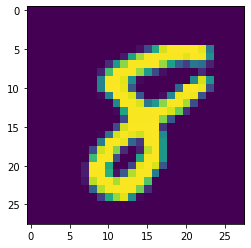

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[777])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #26, 3
model.add(BatchNormalization())
model.add(Dropout(0.125))

model.add(Convolution2D(8, 3, 3, activation='relu', use_bias=False)) #24, 5
model.add(BatchNormalization())
model.add(Dropout(0.125))
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #22, 7
model.add(BatchNormalization())
model.add(Dropout(0.125))
model.add(Convolution2D(32, 3, 3, activation='relu', use_bias=False)) #20, 9
model.add(BatchNormalization())
model.add(Dropout(0.125))

model.add(MaxPooling2D(pool_size=(2, 2))) #10, 18
model.add(Convolution2D(8, 1, 1, activation='relu', use_bias=False)) #10, 18
model.add(BatchNormalization())
model.add(Dropout(0.125))

model.add(Convolution2D(14, 3, 3, activation='relu', use_bias=False)) #8, 20
model.add(BatchNormalization())
model.add(Dropout(0.125))
model.add(Convolution2D(20, 3, 3, activation='relu', use_bias=False)) #6, 22
model.add(BatchNormalization())
model.add(Dropout(0.125))

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False)) #6, 22

model.add(Convolution2D(10, 6, 6, use_bias=False))

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         576       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 8)         32        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6), use_bias=False)`


In [9]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0025 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0025), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0025.
60000/60000 [==============================] - 13s 222us/step - loss: 0.2684 - acc: 0.9127 - val_loss: 0.0643 - val_acc: 0.9793
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0018953753.
60000/60000 [==============================] - 7s 111us/step - loss: 0.0732 - acc: 0.9773 - val_loss: 0.0446 - val_acc: 0.9854
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0015262515.
60000/60000 [==============================] - 7s 111us/step - loss: 0.0560 - acc: 0.9823 - val_loss: 0.0352 - val_acc: 0.9881
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0012774655.
60000/60000 [==============================] - 7s 112us/step - loss: 0.0492 - acc: 0.9845 - val_loss: 0.0317 - val_acc: 0.9887
Epoch

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019615218751045178, 0.9942]
